In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day45-feature-construction-and-feature-splitting/train.csv",usecols=["Age",'Pclass','SibSp','Parch','Survived'])

In [3]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [4]:
df.shape

(891, 5)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
dtype: int64

In [6]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

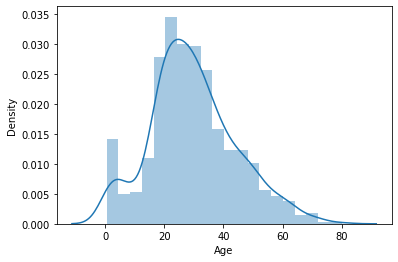

In [7]:
sns.distplot(df.Age)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

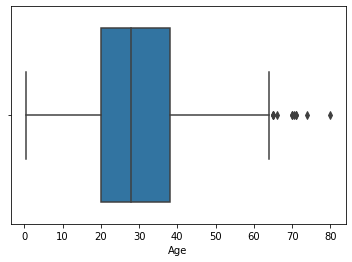

In [8]:
sns.boxplot(df.Age)

In [9]:
percentile25 = df.Age.quantile(0.25)
percentile75 = df.Age.quantile(0.75)

In [10]:
iqr = percentile75 - percentile25
iqr

17.875

In [11]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [12]:
upper_limit,lower_limit

(64.8125, -6.6875)

In [13]:
ndf = df[(df['Age']<upper_limit)& (df['Age']>lower_limit)]

In [14]:
ndf.sample(6)

,Survived,Pclass,Age,SibSp,Parch
383,1,1,35.0,1,0
797,1,3,31.0,0,0
308,0,2,30.0,1,0
504,1,1,16.0,0,0
765,1,1,51.0,1,0
11,1,1,58.0,0,0


In [15]:
ndf.Age.isnull().sum()

0

In [16]:
ndf.shape # null values are also dropped

(703, 5)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

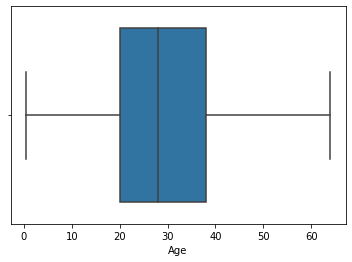

In [17]:
sns.boxplot(ndf.Age)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

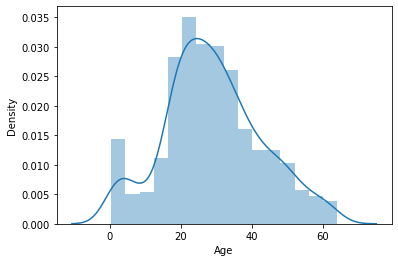

In [18]:
sns.distplot(ndf.Age)

In [19]:
ndf.shape

(703, 5)

In [20]:
X = ndf.drop(columns="Survived")
Y = ndf.Survived

In [21]:
np.mean(cross_val_score(LogisticRegression(),X,Y,scoring='accuracy',cv=10))

0.6944265593561368

# Applying Feature Construction

In [22]:
X['Family_size'] = X["SibSp"] + X["Parch"] + 1  # one is added as we will consider the passanger as the family

In [23]:
X.head()

,Pclass,Age,SibSp,Parch,Family_size
0,3,22.0,1,0,2
1,1,38.0,1,0,2
2,3,26.0,0,0,1
3,1,35.0,1,0,2
4,3,35.0,0,0,1


In [24]:
def  myfunc(n):
    if n==1:
        #alone
        return 0
    elif n>1 & n<=4:
        # small family
        return 1
    else:
        return 2 # large family

In [25]:
myfunc(4)

1

In [26]:
X['Family_type'] = X["Family_size"].apply(myfunc)

In [27]:
X.head()

,Pclass,Age,SibSp,Parch,Family_size,Family_type
0,3,22.0,1,0,2,1
1,1,38.0,1,0,2,1
2,3,26.0,0,0,1,0
3,1,35.0,1,0,2,1
4,3,35.0,0,0,1,0


In [28]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [29]:
X.head()

,Pclass,Age,Family_type
0,3,22.0,1
1,1,38.0,1
2,3,26.0,0
3,1,35.0,1
4,3,35.0,0


In [30]:
np.mean(cross_val_score(LogisticRegression(),X,Y,scoring='accuracy',cv=10))

0.7143661971830986